In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, recall_score, precision_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('dataset.csv')
df.columns = [i for i in range(df.shape[1])]
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.526605,0.745974,5.159662e-07,0.597017,0.690491,-0.025989,0.643981,0.590183,-0.035684,0.682873,...,0.402014,0.449838,-0.073766,0.385337,0.396319,-0.085614,0.375396,0.341747,-0.092800,Hiii
1,0.522538,0.743498,5.240635e-07,0.593046,0.688255,-0.026154,0.640610,0.590183,-0.036173,0.679887,...,0.399269,0.450491,-0.073125,0.382328,0.397554,-0.085608,0.372606,0.343493,-0.093320,Hiii
2,0.517740,0.748209,5.155424e-07,0.588271,0.692740,-0.026316,0.634587,0.594849,-0.036681,0.673669,...,0.395155,0.455739,-0.073824,0.377650,0.404075,-0.085498,0.367255,0.349531,-0.092708,Hiii
3,0.518960,0.749461,5.318837e-07,0.588592,0.694263,-0.027497,0.635851,0.595045,-0.037549,0.675173,...,0.394638,0.458896,-0.070827,0.377420,0.407683,-0.082952,0.367134,0.355372,-0.090327,Hiii
4,0.526822,0.763131,4.931983e-07,0.597002,0.705845,-0.026067,0.642096,0.605004,-0.036905,0.679885,...,0.403735,0.469619,-0.077381,0.387070,0.417935,-0.088821,0.377175,0.365198,-0.095854,Hiii
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
694,0.246283,0.801195,5.933901e-07,0.258480,0.701210,-0.009558,0.304940,0.605782,-0.020024,0.328627,...,0.426441,0.804904,-0.037248,0.407286,0.803167,-0.024524,0.379382,0.802657,-0.012469,Thumps_Up
695,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Thumps_Up
696,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Thumps_Up
697,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Thumps_Up


In [3]:
df = df.rename(columns={63: 'Output'})
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,Output
0,0.526605,0.745974,5.159662e-07,0.597017,0.690491,-0.025989,0.643981,0.590183,-0.035684,0.682873,...,0.402014,0.449838,-0.073766,0.385337,0.396319,-0.085614,0.375396,0.341747,-0.092800,Hiii
1,0.522538,0.743498,5.240635e-07,0.593046,0.688255,-0.026154,0.640610,0.590183,-0.036173,0.679887,...,0.399269,0.450491,-0.073125,0.382328,0.397554,-0.085608,0.372606,0.343493,-0.093320,Hiii
2,0.517740,0.748209,5.155424e-07,0.588271,0.692740,-0.026316,0.634587,0.594849,-0.036681,0.673669,...,0.395155,0.455739,-0.073824,0.377650,0.404075,-0.085498,0.367255,0.349531,-0.092708,Hiii
3,0.518960,0.749461,5.318837e-07,0.588592,0.694263,-0.027497,0.635851,0.595045,-0.037549,0.675173,...,0.394638,0.458896,-0.070827,0.377420,0.407683,-0.082952,0.367134,0.355372,-0.090327,Hiii
4,0.526822,0.763131,4.931983e-07,0.597002,0.705845,-0.026067,0.642096,0.605004,-0.036905,0.679885,...,0.403735,0.469619,-0.077381,0.387070,0.417935,-0.088821,0.377175,0.365198,-0.095854,Hiii
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
694,0.246283,0.801195,5.933901e-07,0.258480,0.701210,-0.009558,0.304940,0.605782,-0.020024,0.328627,...,0.426441,0.804904,-0.037248,0.407286,0.803167,-0.024524,0.379382,0.802657,-0.012469,Thumps_Up
695,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Thumps_Up
696,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Thumps_Up
697,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Thumps_Up


In [4]:
X = df.iloc[:, :-1]
print("Features shape =", X.shape)

Y = df.iloc[:, -1]
print("Labels shape =", Y.shape)

Features shape = (699, 63)
Labels shape = (699,)


In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
svm = SVC(C=10, gamma=0.1, kernel='rbf')
svm.fit(x_train, y_train)

SVC(C=10, gamma=0.1)

In [6]:
y_pred = svm.predict(x_test)
y_pred

array(['Thank_You', 'Thumps_Up', 'Hiii', 'Thank_You', 'Hiii', 'Thank_You',
       'Hello', 'Hiii', 'Hello', 'Thank_You', 'Thank_You', 'Thank_You',
       'Thank_You', 'I_Love_You', 'Hiii', 'I_Love_You', 'Thumps_Up',
       'Thank_You', 'Thank_You', 'Thank_You', 'Hiii', 'Thumps_Up',
       'Thank_You', 'Thumps_Up', 'Thank_You', 'I_Love_You', 'I_Love_You',
       'Thank_You', 'Thumps_Up', 'Hiii', 'Thank_You', 'Thank_You',
       'Thank_You', 'Hiii', 'iloveu', 'Thank_You', 'Thank_You', 'Hello',
       'I_Love_You', 'I_Love_You', 'I_Love_You', 'Hiii', 'Thank_You',
       'iloveu', 'Hello', 'Hello', 'Thank_You', 'Thumps_Down',
       'Thank_You', 'Thumps_Down', 'I_Love_You', 'Thank_You', 'Thank_You',
       'Hello', 'Hello', 'Thank_You', 'Thank_You', 'Thumps_Down', 'Hiii',
       'Hiii', 'I_Love_You', 'Hello', 'I_Love_You', 'Thank_You', 'Hiii',
       'Thank_You', 'Hello', 'Thank_You', 'Thank_You', 'Thank_You',
       'Thank_You', 'Hiii', 'Hiii', 'Thank_You', 'Thank_You', 'Hello',
       'T

In [7]:
cf_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
precision = precision_score(y_test, y_pred, average='micro')
f1, recall, precision

(0.7642857142857142, 0.7642857142857142, 0.7642857142857142)

<AxesSubplot: title={'center': 'Confusion Matrix - American Sign Language'}>

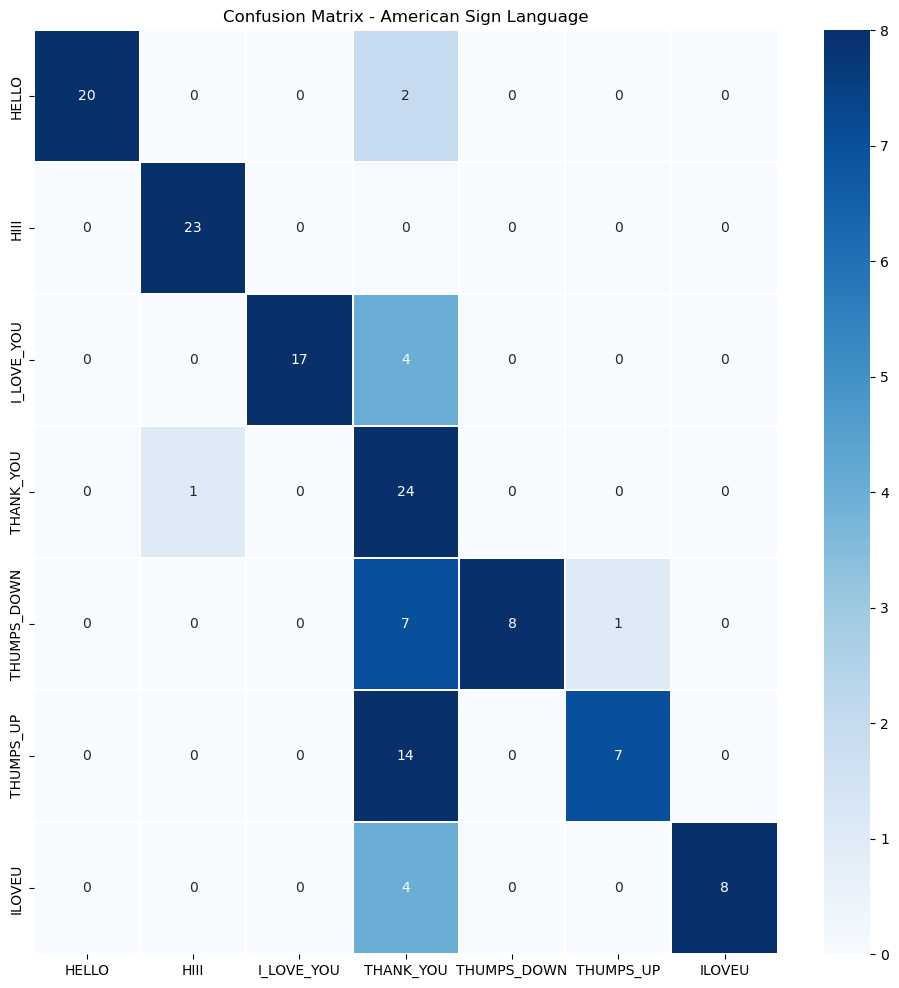

In [8]:
labels = sorted(list(set(df['Output'])))
labels = [x.upper() for x in labels]

fig, ax = plt.subplots(figsize=(12, 12))

ax.set_title("Confusion Matrix - American Sign Language")

maping = sns.heatmap(cf_matrix, 
                     annot=True,
                     cmap = plt.cm.Blues, 
                     linewidths=.2,
                     xticklabels=labels,
                     yticklabels=labels, vmax=8,
                     fmt='g',
                     ax=ax
                    )
maping

In [9]:
import pickle

# save model
with open('model.pkl','wb') as f:
    pickle.dump(svm,f)